In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # Support Vector Machine for Classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
df_train=pd.read_csv('fashion-mnist_train.csv')
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


- **Rows / Columns:** 60.000 / 784 (features/pixels) +1 (target/labels)
- **Types:** all integers
- **Missing values:** None  

**Note:** Data types are consistent

In [4]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [5]:
df_test = pd.read_csv('fashion-mnist_test.csv')
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


- **Rows / Columns:** 10.000 / 784 (features/pixels) +1 (target/labels)
- **Types:** all integers
- **Missing values:** None  

**Note:** Data types are consistent

In [7]:
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [8]:
x_train = df_train.drop(labels='label', axis=1)
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train = df_train['label']
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [10]:
y_train.value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

The dataset is **perfectly balanced**, meaning that each category contains the same number of samples.  
This is an ideal condition for many machine learning tasks, since no class is over- or under-represented, reducing the risk of bias during model training.

In [11]:
x_test = df_test.drop(labels='label', axis=1)
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
y_test = df_test['label']
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [13]:
y_test.value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

The dataset is **perfectly balanced** also for the test set.

**Scaling** is an essential step to achieve strong performance with an **SVM**.

In this dataset, each image is composed of **784 pixels (28×28)**, where each pixel acts as a **numerical feature** with values ranging from 0 to 255. Since the SVM relies on distances and dot products to build its decision boundary, the **scale of the features** directly affects how the model perceives differences between samples.

**Scaling** ensures all pixels contribute equally by bringing them to a uniform scale, typically by dividing by 255 (to get values between 0 and 1). Without scaling, large pixel values would dominate distance computations, distorting the SVM’s margin. Moreover, this preprocessing step speeds up convergence by stabilizing the optimization process.

In [14]:
x_train = x_train/255
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [15]:
x_test = x_test/255
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.121569,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.000000,0.521569,0.878431,0.870588,0.219608,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.145098,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.000000,0.000000,0.0
9996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.109804,0.000000,0.000000,0.0
9997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.674510,0.674510,0.713725,0.780392,0.870588,0.164706,0.000000,0.003922,0.0
9998,0.0,0.003922,0.011765,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


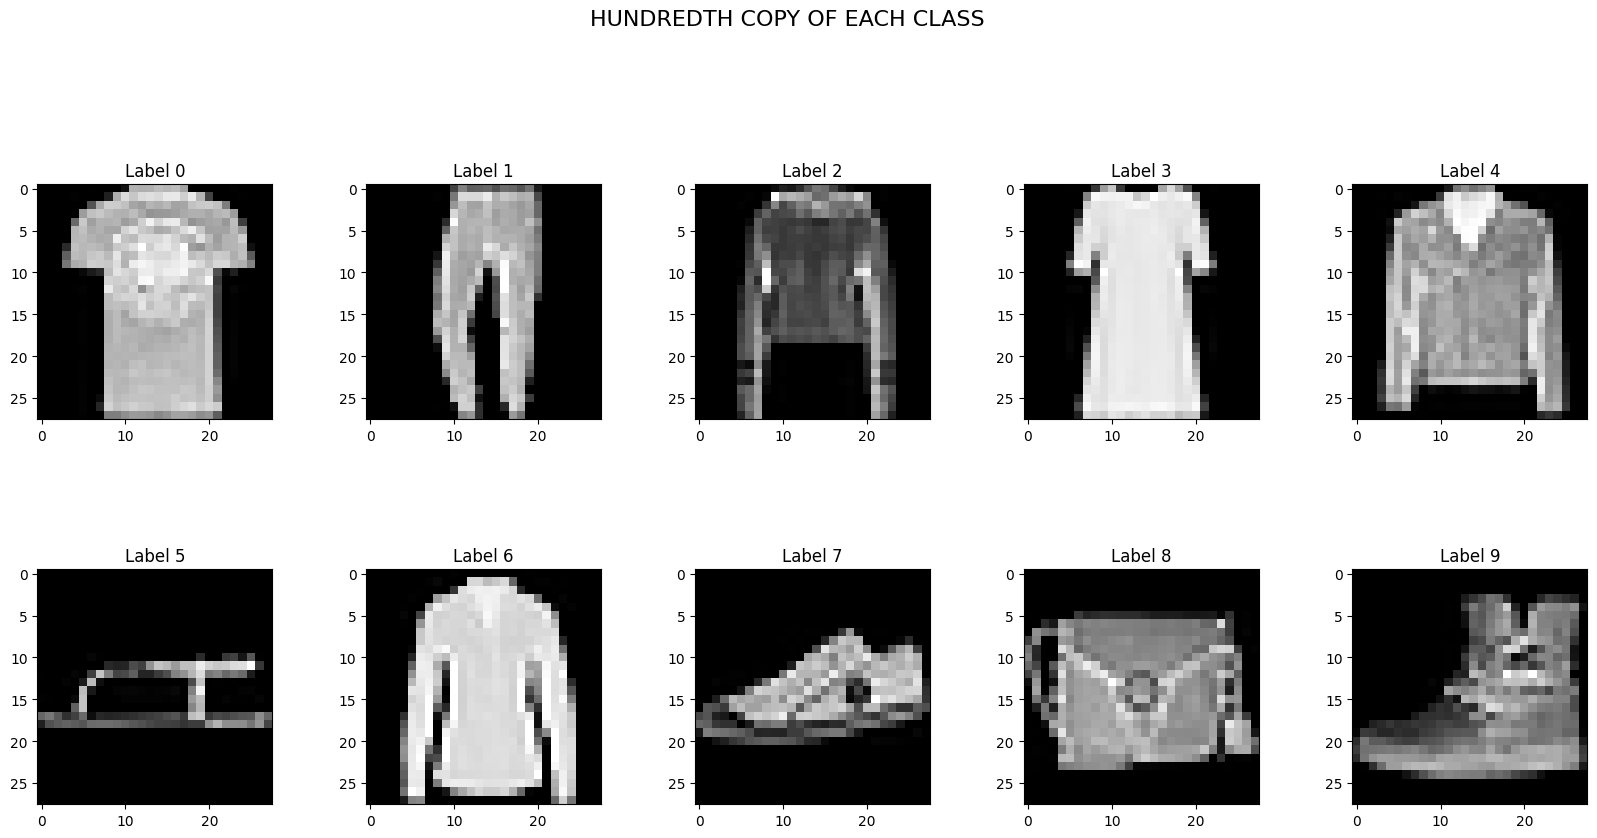

In [ ]:
# Viewing the hundredth sample of each class:
# "fig" represents the entire figure that will contain all the subplots
# "axs" will be a two-dimensional array of shape (2, 5), where each element of the array is an object representing a subplot. it is possible to access each subplot using...
# ... index notation, e.g. axs[0, 0] for the first subplot and axs[1, 4] for the last
fig, axs = plt.subplots(2, 5, figsize=(20,10))

# Adjustment of space between the various subplots horizontally and vertically respectively
plt.subplots_adjust(wspace=0.4, hspace=0.0)

# Title of the entire figure
fig.suptitle('HUNDREDTH COPY OF EACH CLASS', fontsize=16)

# Filling the subplots with images
k=0
for i in range(2):
    for j in range(5):
        if k<10:
            # Extracting the hundredth sample of class k
            a = x_train[y_train==k].iloc[100]
            im = pd.DataFrame(np.array(a).reshape((28,28), order='F'))
            axs[i,j].imshow(im.T, cmap='gray')
            axs[i,j].set_title(f'Label {k}')
            k=k+1

Here I display the 100th sample from every class in the dataset. Each label corresponds to a specific clothing item:

- (0) T-shirt/Top  
- (1) Trouser  
- (2) Pullover  
- (3) Dress  
- (4) Coat  
- (5) Sandal  
- (6) Shirt  
- (7) Sneaker  
- (8) Bag  
- (9) Boot  

This visualization helps me quickly recognize the categories and verify that the dataset is correctly labeled across all classes.

**PCA (Principal Component Analysis)** is another essential step to achieve strong performance with an **SVM** model.

**PCA** becomes valuable because this dataset is a **high-dimensional dataset**. Many pixels are redundant or nearly constant, contributing little to distinguishing digits. PCA reduces dimensionality by combining pixels into new variables (principal components) that capture most of the dataset’s variance.

This brings several benefits:
- Reduces noise and redundancy among features  
- Speeds up SVM training (since complexity grows with the number of features)  
- Lowers the risk of overfitting by focusing on the most informative components

**In summary**:  
- **Scaling** makes pixel values comparable and stabilizes training.  
- **PCA** simplifies the data and removes noise.  
- Together, they make the **SVM** faster, more stable and more accurate in recognizing items.

In [17]:
# PCA with all components
pca = PCA()
scores = pca.fit_transform(x_train)
dfScore = pd.DataFrame(scores, columns=x_train.columns)
dfScore

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3.686333,4.960529,-0.051232,-2.733349,0.391787,1.149178,0.875894,-2.567449,-1.114391,0.786255,...,-0.001178,-0.000603,-0.000005,0.001302,0.000307,-0.000947,0.000435,3.634052e-04,0.000148,0.000030
1,-4.376434,3.861059,-1.949433,-0.803178,0.451490,-0.779967,-1.230174,-1.014531,1.412427,-0.985630,...,-0.000817,-0.000384,0.000197,0.000346,-0.000008,-0.000213,0.000141,5.770826e-07,0.000037,-0.000031
2,7.265152,1.568757,2.315239,0.222004,1.048076,-1.161953,-1.070445,0.301790,-0.431266,-0.090305,...,-0.000015,0.000314,-0.000071,0.000318,-0.000388,-0.000129,0.000035,5.895091e-05,0.000063,0.000084
3,3.227788,-2.325256,-0.649302,1.201164,-0.273992,3.971531,-0.525023,0.135215,-0.050613,-0.620054,...,0.001848,0.001002,-0.001038,0.000718,-0.000784,-0.000822,-0.000462,7.260724e-05,0.000159,-0.000023
4,4.146373,-4.039080,-1.515247,-1.861385,0.561363,0.067154,-0.696509,0.157455,-2.034535,-0.336144,...,0.000193,-0.000302,-0.000184,-0.000126,-0.000772,-0.000046,-0.000209,-1.275333e-06,-0.000048,0.000082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.017613,5.188697,-5.057010,2.388816,-2.132593,-1.021507,-1.214030,0.036965,-0.544185,0.403548,...,0.000803,-0.000278,-0.000747,0.000499,-0.000159,0.001003,0.000288,1.674608e-04,-0.000219,0.000031
59996,-3.115212,-5.211554,-0.104906,0.999169,-0.239473,-1.195494,1.212716,-0.912773,0.596873,0.016609,...,0.000571,-0.000389,-0.000484,0.000084,-0.000122,0.000245,0.000009,-2.728862e-05,-0.000045,0.000004
59997,2.181650,0.451775,-0.556464,1.043356,5.990188,-2.124877,-1.164390,-0.185785,-0.079058,0.080427,...,-0.000684,-0.000171,0.000138,-0.000661,-0.000037,-0.000092,0.000269,4.007429e-06,-0.000172,0.000093
59998,1.470069,6.063398,-0.624757,0.860328,1.883581,-1.186681,2.697167,-1.391427,-0.094573,1.328295,...,0.001657,-0.000885,-0.000030,0.001431,-0.000942,0.000597,-0.000927,1.858879e-05,0.000089,0.000049


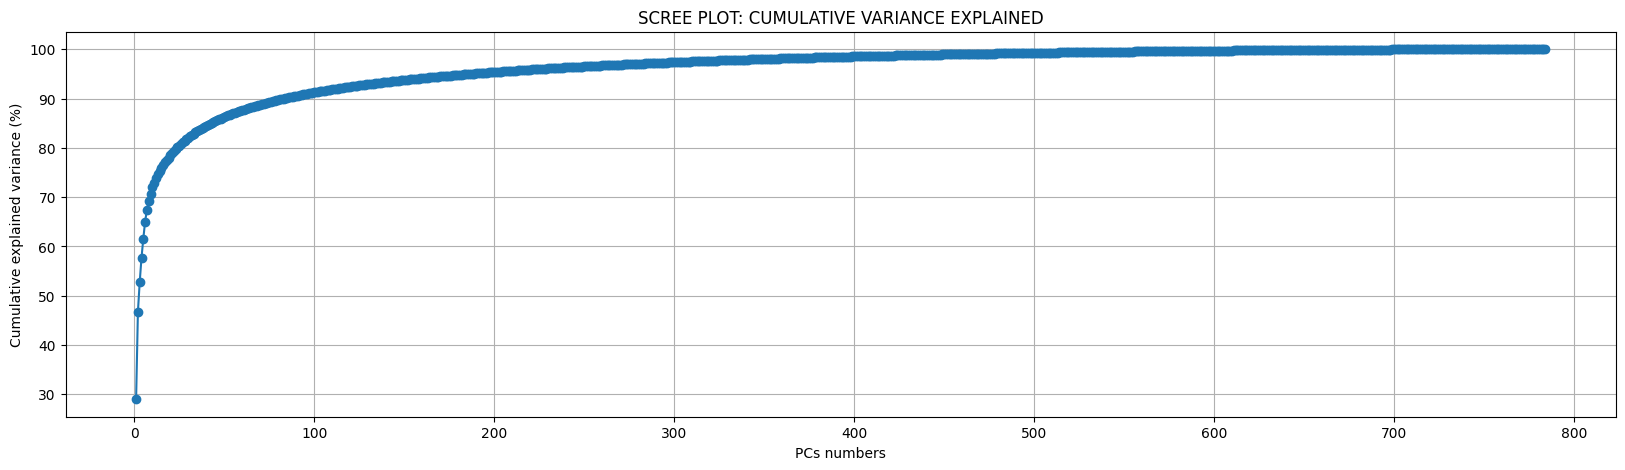

In [18]:
# Cumulative explained variance
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

x = np.arange(1, len(explained_variance_ratio_cumsum) + 1)
y = explained_variance_ratio_cumsum*100

# Figure creation
fig = plt.figure(figsize= (20, 5))
plt.plot(x, y, marker= 'o')
plt.xlabel('PCs numbers')
plt.ylabel('Cumulative explained variance (%)')
plt.title('SCREE PLOT: CUMULATIVE VARIANCE EXPLAINED')
plt.grid(True)

I select **200 components**, as they capture approximately **95% of the total variance**. Beyond this point, the explained variance curve flattens, indicating that adding more components would yield only marginal improvements.

In [19]:
pca = PCA(n_components=200)

# Scores
x_train = pca.fit_transform(x_train)    # Fit and transform
x_test = pca.transform(x_test)          # Only transform (based on the training set fit)

In [20]:
x_train = pd.DataFrame(x_train)
x_train

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3.686333,4.960529,-0.051232,-2.733349,0.391787,1.149178,0.875894,-2.567449,-1.114391,0.786255,...,-0.337891,-0.153622,0.117693,-0.164075,0.191911,-0.211739,-0.055910,-0.129761,0.064545,0.107974
1,-4.376434,3.861059,-1.949433,-0.803178,0.451490,-0.779967,-1.230174,-1.014531,1.412427,-0.985630,...,0.009227,-0.178710,-0.204534,0.229566,-0.042487,-0.206942,-0.210787,0.147495,-0.018991,-0.137059
2,7.265152,1.568757,2.315239,0.222004,1.048076,-1.161953,-1.070445,0.301790,-0.431266,-0.090305,...,0.086770,-0.011816,0.124066,-0.044847,-0.040636,-0.067845,0.017648,0.139786,-0.127219,-0.007095
3,3.227788,-2.325256,-0.649302,1.201164,-0.273992,3.971531,-0.525023,0.135215,-0.050613,-0.620054,...,-0.009982,0.156142,-0.118761,0.160681,-0.205346,0.286309,-0.080272,-0.132671,-0.073836,0.017792
4,4.146373,-4.039080,-1.515247,-1.861385,0.561363,0.067154,-0.696509,0.157455,-2.034535,-0.336144,...,0.076990,-0.197494,-0.026021,0.039321,0.021498,0.247430,0.223394,0.050284,-0.208275,-0.029632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.017613,5.188697,-5.057010,2.388816,-2.132593,-1.021507,-1.214030,0.036965,-0.544185,0.403548,...,-0.064088,0.120041,0.082379,-0.308058,0.040242,-0.026114,0.163680,0.133848,-0.052096,0.197183
59996,-3.115212,-5.211554,-0.104906,0.999169,-0.239473,-1.195494,1.212716,-0.912773,0.596873,0.016609,...,0.033557,0.052793,0.067750,0.100753,0.059828,0.219008,0.109635,0.086117,0.010900,-0.302778
59997,2.181650,0.451775,-0.556464,1.043356,5.990188,-2.124877,-1.164390,-0.185785,-0.079058,0.080427,...,-0.000544,-0.331971,0.089141,-0.056871,-0.076316,-0.198333,-0.158566,-0.052655,-0.068283,-0.191642
59998,1.470069,6.063398,-0.624757,0.860328,1.883581,-1.186681,2.697167,-1.391427,-0.094573,1.328295,...,-0.161290,-0.819385,-0.403751,0.055671,0.301573,0.083394,-0.206300,0.019212,-0.346846,-0.057279


In [21]:
x_test = pd.DataFrame(x_test)
x_test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5.473573,-1.444715,-0.676075,0.796623,1.133669,4.019013,-0.553953,-0.701053,-0.915893,-0.309856,...,0.041664,-0.214345,-0.159795,0.031729,0.080381,0.286556,0.025910,-0.126198,-0.037203,0.265826
1,-0.227181,-6.093546,-1.298496,-0.894832,-1.647758,-1.877511,1.595970,-0.784332,1.430073,0.610826,...,-0.172680,0.002112,0.122528,-0.041735,0.157544,0.068341,0.009656,0.101511,-0.086612,-0.039363
2,-3.215394,-0.571875,3.289303,1.482243,-2.323910,0.208684,-0.440251,-0.201044,-0.098332,-0.727842,...,0.190302,0.068529,-0.095372,0.128621,-0.029692,0.056572,0.082326,-0.139302,-0.012373,-0.027721
3,3.132957,0.689746,2.502725,2.816251,-0.819390,3.974257,1.525332,0.561903,2.051680,0.020178,...,0.074154,0.040051,-0.156695,0.639650,-0.185968,0.561086,-0.176261,-0.395382,-0.222412,-0.120330
4,0.979743,-3.735326,-0.158504,-3.501299,-2.076800,0.096459,-1.275822,0.339560,-1.572895,0.337938,...,0.041872,-0.202460,0.115905,0.153696,-0.058127,-0.053696,0.216682,0.092657,0.221301,0.046130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.272062,-2.535100,0.348958,0.413164,0.242963,2.383661,-0.858926,-0.366558,0.619054,0.732374,...,0.102462,-0.022350,0.107582,0.093222,0.017906,-0.077323,-0.106848,0.018040,0.069362,0.067455
9996,-2.395185,-1.300468,2.778462,2.321655,0.090117,0.001110,-0.133631,-0.451758,-0.288850,-0.162418,...,-0.010978,-0.048809,-0.101553,-0.195874,-0.109804,-0.042933,0.025511,0.180237,-0.003713,-0.182126
9997,1.081447,3.896083,0.189873,1.821769,5.744878,-3.038982,2.306626,0.644190,1.753198,-0.198007,...,-0.123758,-0.372401,0.046893,0.035729,-0.128646,0.333544,0.009907,-0.118911,0.029909,-0.099913
9998,6.126967,5.187415,-0.131867,0.927066,0.266820,1.411801,1.853122,0.122834,-0.283587,0.382938,...,-0.145683,-0.007912,-0.132604,-0.086637,0.089548,0.164822,0.099156,-0.013901,0.228792,0.118529


**SUPPORT VECTOR MACHINE (SVM)**

SVM is a supervised machine learning algorithm commonly used for **classification** and sometimes for **regression**. Its goal is to find a **hyperplane** (a line in 2D, a plane in 3D or higher) that best separates the points of different classes.  

By "best separates" I mean **maximizing the margin**, which is the distance between the hyperplane and the closest points (**support vectors**) of each class. This ensures the classifier is as robust as possible.


Let's start with the dataset:

**1. Dataset**

We have a labeled dataset:

$$
\{(x_i, y_i)\}_{i=1}^n
$$

- $x_i \in \mathbb{R}^d$: feature vector of the $i$-th data point.  
- $y_i \in \{-1, +1\}$: class label of the $i$-th data point.  
- $n$: total number of points in the dataset.  
- $d$: number of features (dimension of the input space).  

---

**2. Separating hyperplane**

The goal is to find a hyperplane that separates the two classes:

$$
w \cdot x + b = 0
$$

- $w \in \mathbb{R}^d$: weight vector, defines the orientation of the hyperplane.  
- $b \in \mathbb{R}$: bias term, defines the shift from the origin.  
- $x \cdot w$: dot product between $x$ and $w$.  

---

**3. Separation constraint (linearly separable case)**

$$
y_i (w \cdot x_i + b) \ge 1, \quad \forall i
$$

Ensures that each point is on the correct side of the hyperplane and at least distance 1 from the margin:
- If $y_i = +1$, then $w \cdot x_i + b$ has to be $\ge 1$  
- If $y_i = -1$, then $w \cdot x_i + b$ has to be $\le -1$  

---

**4. Margin**

The geometric margin is:

$$
\text{margin} = \frac{2}{\|w\|}
$$

- $\|w\|$: Euclidean norm of $w$.  
- The margin is the distance between the closest points of each class and the hyperplane.  
- SVM maximizes this margin.

---

**5. Soft margin (non-linearly separable case)**

Introduce slack variables $\xi_i \ge 0$:

$$
y_i (w \cdot x_i + b) \ge 1 - \xi_i
$$

- $\xi_i = 0$: correctly classified outside the margin.  
- $0 < \xi_i < 1$: correctly classified but inside the margin.  
- $\xi_i > 1$: misclassified point.  

---

**Penalty parameter**

$$
C > 0
$$

Balances **margin size**/**model complexity** and **errors tollerance**:
- Large $C$: fewer errors, smaller margin (risk overfitting)
- Small $C$: allows more errors, wider margin (risk undeerfitting).

In other words, $C$ is the trade-off between the model performance and its generalization, thus a crucial hyper-parameter.

---

**6. Dual problem and Lagrange multipliers**

Introduce Lagrange multipliers $\alpha_i \ge 0$:

$$
f(x) = \text{sign}\Bigg( \sum_{i=1}^n \alpha_i y_i K(x_i, x) + b \Bigg)
$$

- $K(x_i, x)$: kernel function, measures similarity between $x_i$ and $x$.  
- Only points with $\alpha_i > 0$ (**support vectors**) determine the decision boundary.  

---

**7. Kernel trick**

If data is not linearly separable in the original space, map it to a higher-dimensional space via $\phi(x)$:

$$
K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle
$$

Common kernels:  
- Linear: $K(x,z) = x \cdot z$  
- Polynomial: $K(x,z) = (x \cdot z + c)^p$  
- RBF (Gaussian): $K(x,z) = \exp(-\gamma \|x - z\|^2)$


**TRADE-OFF PARAMETER C**

One of the most crucial hyperparameters influencing model performance is the **regularization parameter C**. It controls the balance between fitting the training data well and maintaining generalization.  

If not properly tuned, an inappropriate value of "C" can easily lead to **overfitting** or **underfitting**. To better understand its impact, I run the model using different values of this parameter and observe how its performance changes across them.

Finally, I selected the **accuracy score** as the primary evaluation metric, since the dataset is well balanced across categories.

This metric provides a clear and intuitive measure of overall performance, indicating the proportion of correctly classified observations.  

In this context, accuracy is sufficient to assess model quality without the need for additional imbalance-adjusted metrics such as precision, recall or F1-score (which will be part of the validation phase).

In [22]:
c = [0.01, 0.1, 1, 10, 100]
train_accuracy=[]

for trade_off in c:
    print(f'Fitting SMV with C= {trade_off}')
    svc = SVC(C=trade_off, verbose= 1)
    svc.fit(x_train, y_train)
    y_train_pred = svc.predict(x_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

Fitting SMV with C=0.01
[LibSVM]Fitting SMV with C=0.1
[LibSVM]Fitting SMV with C=1
[LibSVM]Fitting SMV with C=10
[LibSVM]Fitting SMV with C=100
[LibSVM]

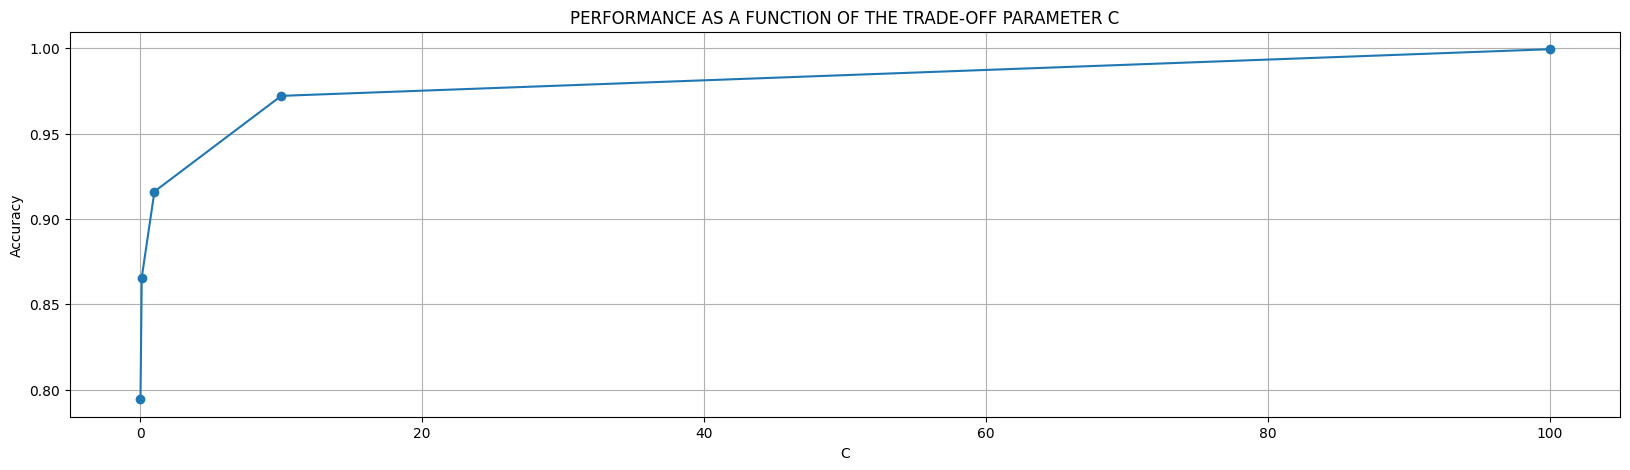

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(c, train_accuracy, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('PERFORMANCE AS A FUNCTION OF THE TRADE-OFF PARAMETER C')
plt.grid(True)
plt.show()

Setting the regularization parameter **C** around the order of $10^2$ leads to an almost perfect performance, which is a clear sign of potential **overfitting**.  

A value of **C = 10** seems more balanced: the model performs well but not perfectly, suggesting a better generalization to unseen data. However, **C = 1** could also be a solid alternative, as it still maintains high performance with possibly less overfitting risk.  

I would proceed with **C = 10** for now and re-evaluate with **C = 1** if any overfitting symptoms appear after.

**KERNEL**

The **kernel** is the second key hyperparameter influencing the performance of an SVM model.

Just like with the "C" parameter, I will experiment with different kernel types to observe how they affect the model’s ability.  

By comparing their performance, we can better understand which kernel function provides the best balance between complexity and accuracy for our dataset.

In [24]:
kernel = ['linear', 'poly', 'rbf']
train_accuracy=[]

for k in kernel:
    print(f'Fitting SMV with kernel= {k}')
    svc = SVC(C=10, kernel= k, verbose= 1)
    svc.fit(x_train, y_train)
    y_train_pred = svc.predict(x_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

Fitting SMV with kernel=linear
[LibSVM]Fitting SMV with kernel=poly
[LibSVM]Fitting SMV with kernel=rbf
[LibSVM]

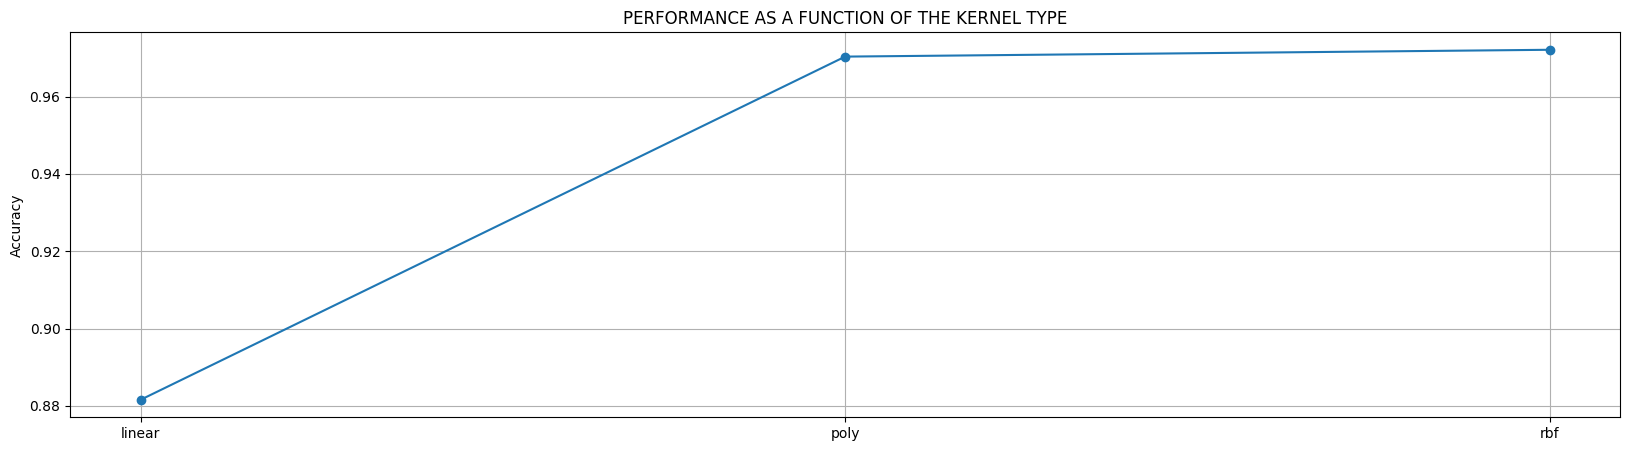

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(kernel, train_accuracy, marker='o')
plt.ylabel('Accuracy')
plt.title('PERFORMANCE AS A FUNCTION OF THE KERNEL TYPE')
plt.grid(True)
plt.show()

The results show that the **RBF kernel** performs best for this classification task.

The **linear kernel** is too weak to capture the underlying relationships.

Therefore, the **RBF kernel**, both optimized and computationally faster than the others, is selected as the default choice for this analysis.

**GAMMA**

The last SVM hyperparameter Iwill explore is **gamma**.  

In Support Vector Machines (SVMs), **gamma** controls how far the influence of each training sample extends in shaping the decision boundary.

When **gamma is low**, each point has a **wide area of influence**, leading to **smoother and more generalized** decision surfaces. The model captures broader trends but may miss finer details (possible underfitting).

When **gamma is high**, the influence of each point becomes **very localized**, producing **complex and highly flexible** boundaries. This can improve accuracy on the training set but increases the risk of **overfitting**.

In essence, **gamma defines the flexibility of the model**:
- Lower values → smoother, more general boundaries  
- Higher values → tighter, more complex boundaries

Finding the right balance for gamma is crucial to achieving good generalization performance.

In "sklearn.svm.SVC", we can set the **gamma** parameter manually or automatically using one of two built-in modes:  

- **gamma='scale' (default)**  
  uses the formula:  
  $$
  \text{gamma} = \frac{1}{n_{\text{features}} \times \text{Var}(X)}
  $$
  this means gamma adapts to both the **number of features** and the **data variance**, making it more stable and generally recommended for most cases.  

- **gamma='auto'**  
  uses a simpler formula:  
  $$
  \text{gamma} = \frac{1}{n_{\text{features}}}
  $$
  it ignores the data variance, which can lead to **overfitting** if feature scales differ significantly.


In [26]:
gamma = ['auto', 'scale']
train_accuracy=[]

for g in gamma:
    print(f'Fitting SMV with gamma= {g}')
    svc = SVC(C=10, kernel= 'rbf', gamma= g, verbose= 1)
    svc.fit(x_train, y_train)
    y_train_pred = svc.predict(x_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

Fitting SMV with gamma= auto
[LibSVM]Fitting SMV with gamma= scale
[LibSVM]

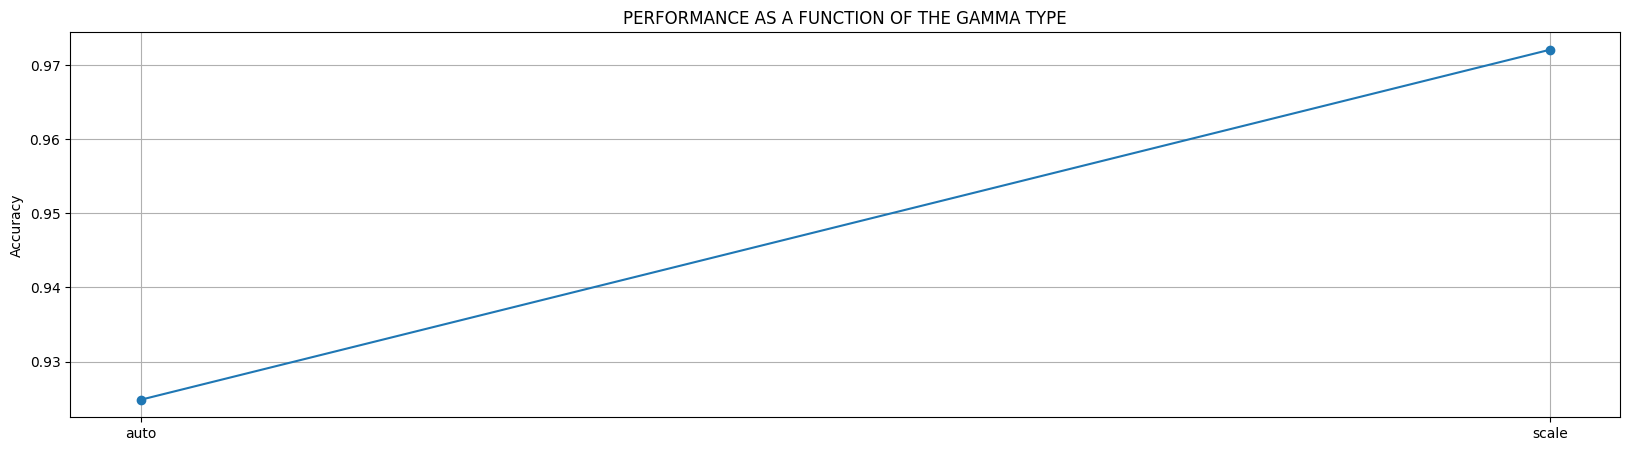

In [27]:
plt.figure(figsize=(20, 5))
plt.plot(gamma, train_accuracy, marker='o')
plt.ylabel('Accuracy')
plt.title('PERFORMANCE AS A FUNCTION OF THE GAMMA TYPE')
plt.grid(True)
plt.show()

The most appropriate setting for this model is **gamma = "scale"**, confirming itsel as the most reliable default for kernel-based methods such as SVMs.

In [28]:
svc = SVC(C= 10)
svc.fit(x_train, y_train)
y_train_pred = svc.predict(x_train)

In [29]:
print(f'{100*accuracy_score(y_train, y_train_pred)}%')

97.21%


In [30]:
y_test_pred = svc.predict(x_test)
print(f'{100*accuracy_score(y_true= y_test, y_pred= y_test_pred)}%')

91.02%


The model achieved an **accuracy of 97.21% on the training set** and **91.02% on the test set**. This indicates that the model has learned the underlying patterns in the data quite well, generalizing effectively to unseen samples.  

The small gap between training and test accuracy suggests **limited overfitting**, meaning that the model balances complexity and generalization appropriately. Overall, performance appears robust and reliable for predictive use.

Cross-validation is a key technique in **statistics and machine learning** to evaluate how well a predictive model generalizes to unseen data. In simple terms, it estimates a model’s performance helping avoid overestimating accuracy due to overfitting.

**Why it matters**:  
When a model is trained on a dataset, it may learn only the specific details of the training data instead of general patterns. Cross-validation tests the model on separate subsets of data, providing a more realistic performance estimate.

**How it works (k-fold cross-validation)**:  
1. Split the dataset into **k equally sized folds**.  
2. For each fold:  
   - Train the model on the remaining k-1 folds  
   - Test it on the current fold  
3. Repeat for all k folds  
4. Average the performance metrics (accuracy, RMSE, F1-score, etc.) across folds  

This process gives a reliable estimate of how the model will perform on new data.

**Common variants:**  
- **Leave-One-Out (LOO):** each fold has a single example; very precise but computationally expensive for large datasets  
- **Stratified k-fold:** preserves class proportions in each fold, useful for imbalanced classification  
- **Repeated k-fold:** repeats k-fold with different splits for more stable estimates  

**Advantages:**  
- Reduces the risk of overfitting
- Provides a more robust evaluation than a single train/test split
- Suitable even for relatively small datasets

In [31]:
# Cross-validation with 6 fold
scores = cross_val_score(estimator= svc, X= x_train, y= y_train, cv= 6, scoring= 'accuracy', n_jobs= -2, verbose= 1)
print(f'Cross-validation scores: {scores}')
print(f'Mean scores: {scores.mean()}')

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done   6 out of   6 | elapsed:  5.0min finished


Cross-validation scores: [0.9063 0.9054 0.9095 0.9043 0.9036 0.9056]
Mean scores: 0.9057833333333333


The individual scores are closely around a mean of **90%**, indicating low variance. This suggests that the model is quite stable, with performance largely independent of which specific data subset is used for training or testing.  

Moreover, the combination of low variance and a high cross-validation mean score implies that the model is likely to **generalize well** to new, unseen data.

In [32]:
# I convert the report into a DataFrame
report = classification_report(y_test, y_test_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.833333,0.8750,0.853659,1000.0000
1,0.991927,0.9830,0.987443,1000.0000
2,0.851064,0.8400,0.845496,1000.0000
3,0.905790,0.9230,0.914314,1000.0000
4,0.857564,0.8730,0.865213,1000.0000
5,0.985641,0.9610,0.973165,1000.0000
6,0.788009,0.7360,0.761117,1000.0000
7,0.944172,0.9640,0.953983,1000.0000
8,0.979021,0.9800,0.979510,1000.0000
9,0.963147,0.9670,0.965070,1000.0000


In [33]:
# i keep only the part that interests me
df_report = df_report.iloc[:-3,:-1]
df_report

,precision,recall,f1-score
0,0.833333,0.875,0.853659
1,0.991927,0.983,0.987443
2,0.851064,0.840,0.845496
3,0.905790,0.923,0.914314
4,0.857564,0.873,0.865213
5,0.985641,0.961,0.973165
6,0.788009,0.736,0.761117
7,0.944172,0.964,0.953983
8,0.979021,0.980,0.979510
9,0.963147,0.967,0.965070


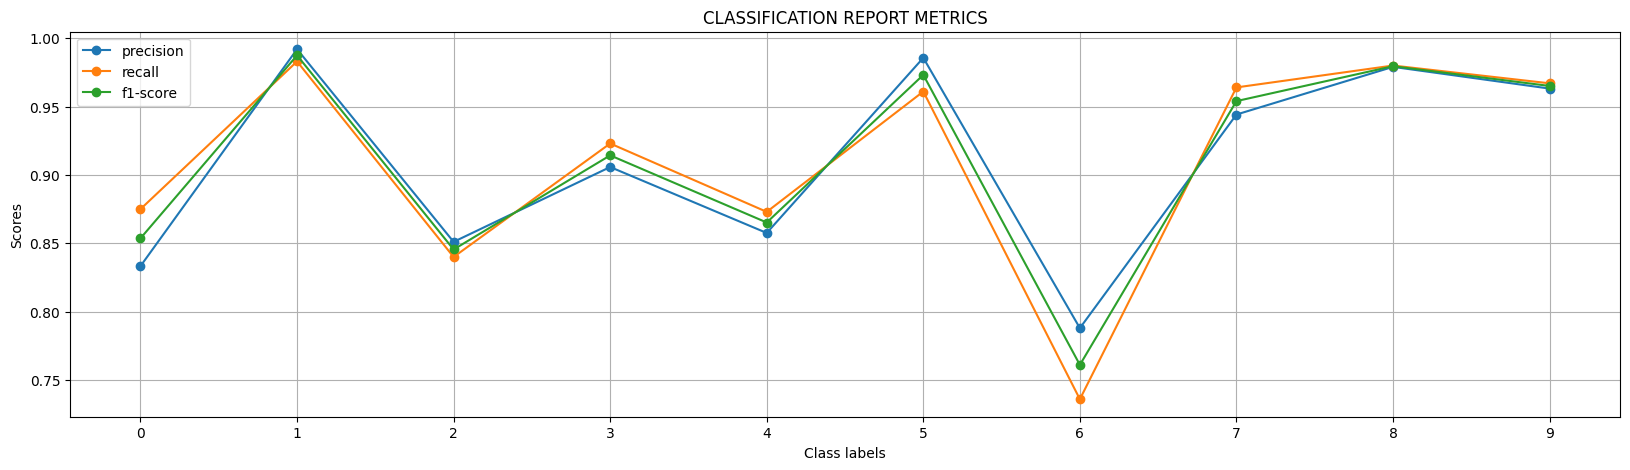

In [34]:
# Plotting
plt.figure(figsize=(20, 5))
for metric in df_report:
    plt.plot(df_report.index, df_report.loc[df_report.index, metric], label=metric, marker='o') # With "index" I access the name of the rows

# Plot settings
plt.xlabel('Class labels')
plt.ylabel('Scores')
plt.title('CLASSIFICATION REPORT METRICS')
plt.legend()
plt.grid(True)
plt.show()

The most confused class is **6 (shirt)**, indicating that the model struggles to distinguish shirts from other categories. On the other hand, the best-classified categories are **1 (trouser)**, **5 (sandal)** and **8 (bag)**, which the model identifies with high accuracy.

Text(0.5, 1.0, 'CONFUSION MATRIX HEATMAP')

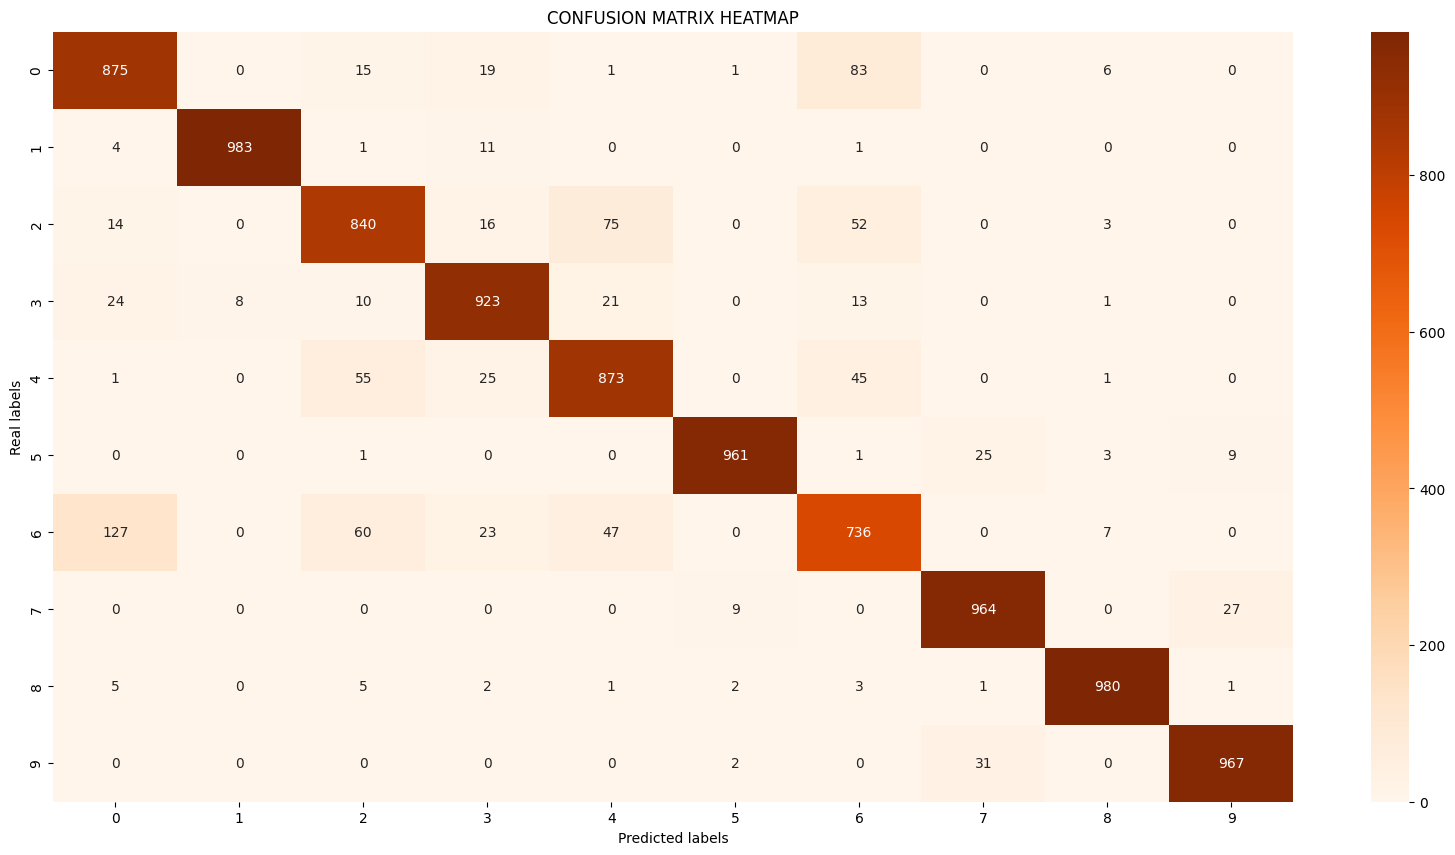

In [35]:
#   Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=np.sort(y_test.unique()), yticklabels=np.sort(y_test.unique()))    # With "annot=True" the numbers will be...
                                                                                                                                    # ... shown inside each cell of the...
                                                                                                                                    # ... heatmap.

plt.xlabel('Predicted labels')
plt.ylabel('Real labels')
plt.title('CONFUSION MATRIX HEATMAP')

We observe that the model struggles most to distinguish **shirts** from **T-shirts/tops**, and also has difficulty with **pullovers** and **coats**. This is expected, as these items share similar features and are naturally more easily confusable.